In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def string_to_list(string):
    no_whitespace = ''.join(string.split())
    lst = list(no_whitespace.split(','))
    return lst

data_filepath = 'languageAblationResults.csv'
df = pd.read_csv(data_filepath)
df['TrainList'] = df['TrainLang'].apply(string_to_list)
df

,TrainLang,TestLang,Datasource,Test,Dev,TrainList
0,DE,DE,NaN,0.727,0.6,[DE]
1,DE,EN,News,0.670,0.6,[DE]
2,DE,EN,WikiNews,0.623,0.6,[DE]
3,DE,EN,Wikipedia,0.626,0.6,[DE]
4,DE,ES,NaN,0.726,0.6,[DE]
5,DE,FR,NaN,0.758,0.6,[DE]
6,"DE, EN",DE,NaN,0.732,0.6,"[DE, EN]"
7,"DE, EN",EN,News,0.671,0.6,"[DE, EN]"
8,"DE, EN",EN,WikiNews,0.640,0.6,"[DE, EN]"
9,"DE, EN",EN,Wikipedia,0.670,0.6,"[DE, EN]"


In [3]:
def test_not_in_train(row):
#     test = row['Training Language']
    trainlist = row['TrainList']
    testlang = row['TestLang']
    result = not (testlang in trainlist)
    return result


no_self_test = df.loc[df.apply(test_not_in_train, axis=1)]

In [4]:
test_fr = df.loc[df['TestLang'] == 'DE']
test_en = df.loc[df['TestLang']  == 'EN']
test_es = df.loc[df['TestLang']  == 'ES']
test_de = df.loc[df['TestLang']  == 'FR']

In [5]:
h_order = ['DE', 'EN', 'ES', 'DE, EN', 'EN, ES' ,'DE, EN, ES']
c_order = sns.husl_palette(l=0.6)

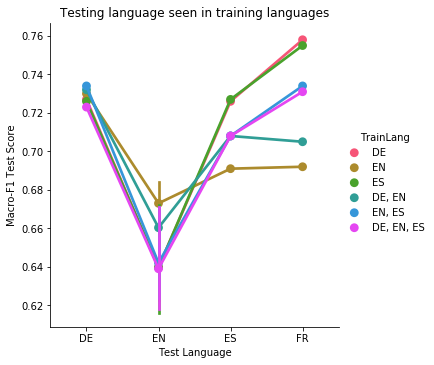

In [17]:
ax = sns.catplot('TestLang', 'Test', data=df, hue='TrainLang', hue_order=h_order, palette=c_order, kind="point")
ax.set(xlabel='Test Language', ylabel='Macro-F1 Test Score', title='Testing language seen in training languages')
plt.show()

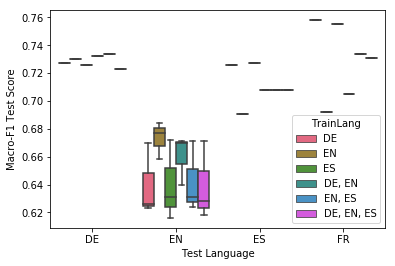

In [21]:
# ax = sns.boxplot('TestLang', 'Test', data=df[df['TestLang'] == 'EN'], hue='TrainLang', hue_order=h_order, palette=c_order)
ax = sns.boxplot('TestLang', 'Test', data=df, hue='TrainLang', hue_order=h_order, palette=c_order)
ax.set(xlabel='Test Language', ylabel='Macro-F1 Test Score')
plt.show()

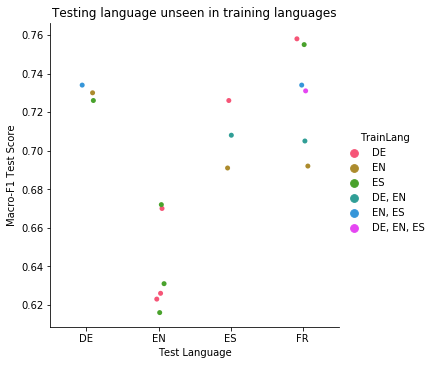

In [16]:
ax = sns.catplot('TestLang', 'Test', data=no_self_test, hue='TrainLang', hue_order=h_order, palette=c_order,order=['DE', 'EN', 'ES', 'FR'])
ax.set(xlabel='Test Language', ylabel='Macro-F1 Test Score', title='Testing language unseen in training languages')
plt.show()